In [69]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from textblob import TextBlob

### Authenticate

In [17]:
api_key = 'MxCitK6ceUv6HXopqNS9AqPPZDWzuU2I_WqbnQhkO0B3'
url = 'https://api.us-south.tone-analyzer.watson.cloud.ibm.com/instances/edeb8d56-917a-4dac-a192-b1bfc7f2eb39'

In [3]:
from ibm_watson import ToneAnalyzerV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [18]:
authenticator = IAMAuthenticator(api_key)
ta = ToneAnalyzerV3(version = '2017-09-21', authenticator=authenticator)

In [19]:
ta.set_service_url(url)

### Tone Analysis

##### Read data

In [10]:
data = pd.read_csv("AItextscored_blinded.csv")

In [25]:
len(data)

2001

In [11]:
data.head()

,Unnamed: 0,Text
0,0,It has been widely reported that AI. AI will n...
1,1,I'm sure that AI will mean humans have less wo...
2,2,Orange dog cat ML I think hello. AI plays an i...
3,3,I can't think of anything more frightening tha...
4,4,AI seems to be useful only under very specific...


In [ ]:
# ta.tone("I am happy").get_result()

In [24]:
len(result_list)

1504

In [29]:
part_2_data = data[1504:]

In [30]:
len(part_2_data)

497

In [31]:
1504+497

2001

In [22]:
%%time
result_list = []
for index, row in data.iterrows():
    result_list.append(ta.tone(row["Text"]).get_result())
    
#     print(row["Text"])
    

ERROR:root:The connection failed because the SSL certificate is not valid. To use a self-signed certificate, disable verification of the server's SSL certificate by invoking the set_disable_ssl_verification(True) on your service instance and/ or use the disable_ssl_verification option of the authenticator.
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/contrib/pyopenssl.py", line 485, in wrap_socket
    cnx.do_handshake()
  File "/opt/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1934, in do_handshake
    self._raise_ssl_error(self._ssl, result)
  File "/opt/anaconda3/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1663, in _raise_ssl_error
    raise SysCallError(errno, errorcode.get(errno))
OpenSSL.SSL.SysCallError: (54, 'ECONNRESET')

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/urllib3/connectionpool.py", line 67

SSLError: HTTPSConnectionPool(host='api.us-south.tone-analyzer.watson.cloud.ibm.com', port=443): Max retries exceeded with url: /instances/edeb8d56-917a-4dac-a192-b1bfc7f2eb39/v3/tone?version=2017-09-21 (Caused by SSLError(SSLError("bad handshake: SysCallError(54, 'ECONNRESET')")))

In [32]:
%%time
result_list_2 = []
for index, row in part_2_data.iterrows():
    result_list_2.append(ta.tone(row["Text"]).get_result())

CPU times: user 2.34 s, sys: 242 ms, total: 2.58 s
Wall time: 3min 9s


In [33]:
final_list = result_list + result_list_2

In [34]:
len(final_list)

2001

#### Get document score

In [45]:
document_score_list = []
for i in range(len(final_list)):
    document_score_list.append(final_list[i].get('document_tone').get('tones'))

In [54]:
document_score_list[:5]

[[{'score': 0.84639, 'tone_id': 'tentative', 'tone_name': 'Tentative'},
  {'score': 0.89196, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.58429, 'tone_id': 'sadness', 'tone_name': 'Sadness'},
  {'score': 0.940379, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.773748, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.882284, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.654595, 'tone_id': 'joy', 'tone_name': 'Joy'},
  {'score': 0.852741, 'tone_id': 'analytical', 'tone_name': 'Analytical'},
  {'score': 0.746645, 'tone_id': 'tentative', 'tone_name': 'Tentative'}]]

In [52]:
final_list[0].get('document_tone').get('tones')[0]

{'score': 0.84639, 'tone_id': 'tentative', 'tone_name': 'Tentative'}

In [112]:
# final_list

#### Get unique tone

In [119]:
document_score_list[:2]

[[{'score': 0.84639, 'tone_id': 'tentative', 'tone_name': 'Tentative'},
  {'score': 0.89196, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.58429, 'tone_id': 'sadness', 'tone_name': 'Sadness'},
  {'score': 0.940379, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]]

In [117]:
document_score_list[0][0].get('tone_id')

'tentative'

In [123]:
tone_word_list = []
for each_document in document_score_list:
    for i in range(len(each_document)):
        tone_word_list.append(each_document[i].get('tone_id'))
        

In [126]:
tone_word_unique = set(tone_word_list)

In [127]:
tone_word_unique

{'analytical', 'confident', 'fear', 'joy', 'sadness', 'tentative'}

In [43]:
data["score_full"] = final_list

In [109]:
final_list[:2]

[{'document_tone': {'tones': [{'score': 0.84639,
     'tone_id': 'tentative',
     'tone_name': 'Tentative'},
    {'score': 0.89196, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]},
  'sentences_tone': [{'sentence_id': 0,
    'text': 'It has been widely reported that AI.',
    'tones': []},
   {'sentence_id': 1,
    'text': 'AI will not have much of an effect on the world.',
    'tones': [{'score': 0.862286,
      'tone_id': 'analytical',
      'tone_name': 'Analytical'}]},
   {'sentence_id': 2,
    'text': 'AI is often not the most practical solution.',
    'tones': [{'score': 0.532714, 'tone_id': 'joy', 'tone_name': 'Joy'},
     {'score': 0.88939, 'tone_id': 'tentative', 'tone_name': 'Tentative'},
     {'score': 0.762356,
      'tone_id': 'analytical',
      'tone_name': 'Analytical'}]}]},
 {'document_tone': {'tones': [{'score': 0.58429,
     'tone_id': 'sadness',
     'tone_name': 'Sadness'},
    {'score': 0.940379, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]},
  'sen

In [44]:
data.head()

,Unnamed: 0,Text,score_full
0,0,It has been widely reported that AI. AI will n...,{'document_tone': {'tones': [{'score': 0.84639...
1,1,I'm sure that AI will mean humans have less wo...,{'document_tone': {'tones': [{'score': 0.58429...
2,2,Orange dog cat ML I think hello. AI plays an i...,{'document_tone': {'tones': [{'score': 0.77374...
3,3,I can't think of anything more frightening tha...,{'document_tone': {'tones': [{'score': 0.88228...
4,4,AI seems to be useful only under very specific...,{'document_tone': {'tones': [{'score': 0.65459...


In [48]:
data["score_document_score"] = document_score_list

In [49]:
data.head()

,Unnamed: 0,Text,score_full,score_document_score
0,0,It has been widely reported that AI. AI will n...,{'document_tone': {'tones': [{'score': 0.84639...,"[{'score': 0.84639, 'tone_id': 'tentative', 't..."
1,1,I'm sure that AI will mean humans have less wo...,{'document_tone': {'tones': [{'score': 0.58429...,"[{'score': 0.58429, 'tone_id': 'sadness', 'ton..."
2,2,Orange dog cat ML I think hello. AI plays an i...,{'document_tone': {'tones': [{'score': 0.77374...,"[{'score': 0.773748, 'tone_id': 'analytical', ..."
3,3,I can't think of anything more frightening tha...,{'document_tone': {'tones': [{'score': 0.88228...,"[{'score': 0.882284, 'tone_id': 'analytical', ..."
4,4,AI seems to be useful only under very specific...,{'document_tone': {'tones': [{'score': 0.65459...,"[{'score': 0.654595, 'tone_id': 'joy', 'tone_n..."


In [60]:
data.to_csv("AItext_with_tone_analyzer.csv")

#### Visualization

In [132]:
## Get the first two elements in the dictionary
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [135]:
n_items = take(2, document_score_list[0][0].items())

In [136]:
n_items

[('score', 0.84639), ('tone_id', 'tentative')]

In [208]:
tone_word_list = []
for each_doc in document_score_list:
    each_doc_list = []
    for i in range(len(each_doc)):
        each_doc_list.append(take(2, each_doc[i].items()))
    tone_word_list.append(each_doc_list)

In [209]:
tone_word_list[:2]

[[[('score', 0.84639), ('tone_id', 'tentative')],
  [('score', 0.89196), ('tone_id', 'analytical')]],
 [[('score', 0.58429), ('tone_id', 'sadness')],
  [('score', 0.940379), ('tone_id', 'analytical')]]]

In [146]:
first_sentence = tone_word_list[0]

In [147]:
first_sentence

[[('score', 0.84639), ('tone_id', 'tentative')],
 [('score', 0.89196), ('tone_id', 'analytical')]]

In [154]:
plot_list = []
for each_tone in first_sentence:
    plot_list.append([x[1] for x in each_tone])

In [155]:
plot_list

[[0.84639, 'tentative'], [0.89196, 'analytical']]

In [165]:
xAxis = []
for i in plot_list:
    xAxis.append(i[0])


In [166]:
yAxis = []
for y in plot_list:
    yAxis.append(y[1])

In [167]:
yAxis

['tentative', 'analytical']

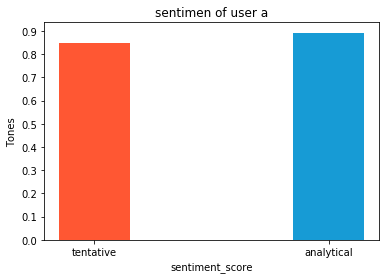

In [201]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(yAxis, xAxis, width=0.3, color=('#FF5733', '#179BD5'))
plt.title('sentimen of user a')
plt.xlabel('sentiment_score')
plt.ylabel('Tones')
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

In [210]:
second_sentence = tone_word_list[1]

In [211]:
plot_list_2 = []
for each_tone_2 in second_sentence:
    plot_list_2.append([x[1] for x in each_tone_2])

In [212]:
xAxis_2 = []
for i in plot_list_2:
    xAxis_2.append(i[0])

In [213]:
yAxis_2 = []
for y in plot_list_2:
    yAxis_2.append(y[1])

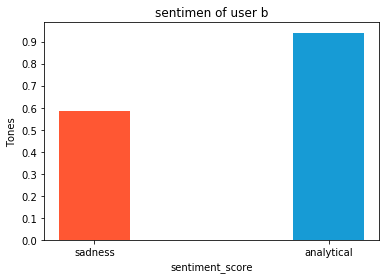

In [215]:

plt.bar(yAxis_2, xAxis_2, width=0.3, color=('#FF5733', '#179BD5'))
plt.title('sentimen of user b')
plt.xlabel('sentiment_score')
plt.ylabel('Tones')
plt.yticks(np.arange(0, 1, step=0.1))
plt.show()

In [128]:
document_score_list[:2]

[[{'score': 0.84639, 'tone_id': 'tentative', 'tone_name': 'Tentative'},
  {'score': 0.89196, 'tone_id': 'analytical', 'tone_name': 'Analytical'}],
 [{'score': 0.58429, 'tone_id': 'sadness', 'tone_name': 'Sadness'},
  {'score': 0.940379, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]]

In [131]:
document_score_list[0]

[{'score': 0.84639, 'tone_id': 'tentative', 'tone_name': 'Tentative'},
 {'score': 0.89196, 'tone_id': 'analytical', 'tone_name': 'Analytical'}]

### My sentiment analysis

In [110]:
# https://data-science-blog.com/blog/2018/11/04/sentiment-analysis-using-python/

In [63]:
# change review type to string
data['Text'] = data['Text'].astype(str)
# lower case
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [64]:
## remove punctuation
data['Text'] = data['Text'].str.replace('[^\w\s]','')

In [66]:
# Stop words
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [75]:
# the first score is sentiment polarity which tells if the sentiment is positive or negative and 
# the second score is subjectivity score to tell how subjective is the text.
def senti(x):
    return TextBlob(x).sentiment  
 
data['senti_score'] = data['Text'].apply(senti)
 
data.senti_score.head()

0                    (0.05, 0.30000000000000004)
1    (0.0029761904761904973, 0.5728174603174603)
2                                     (0.4, 1.0)
3                    (0.15000000000000002, 0.95)
4                                 (0.192, 0.333)
Name: senti_score, dtype: object

In [77]:
data.head(10)

,Unnamed: 0,Text,score_full,score_document_score,stemming,senti_score
0,0,widely reported ai ai much effect world ai oft...,{'document_tone': {'tones': [{'score': 0.84639...,"[{'score': 0.84639, 'tone_id': 'tentative', 't...",wide report ai ai much effect world ai often p...,"(0.05, 0.30000000000000004)"
1,1,im sure ai mean humans less work good bad thin...,{'document_tone': {'tones': [{'score': 0.58429...,"[{'score': 0.58429, 'tone_id': 'sadness', 'ton...",im sure ai mean human less work good bad thing...,"(0.0029761904761904973, 0.5728174603174603)"
2,2,orange dog cat ml think hello ai plays importa...,{'document_tone': {'tones': [{'score': 0.77374...,"[{'score': 0.773748, 'tone_id': 'analytical', ...",orang dog cat ml think hello ai play import ro...,"(0.4, 1.0)"
3,3,cant think anything frightening machines truly...,{'document_tone': {'tones': [{'score': 0.88228...,"[{'score': 0.882284, 'tone_id': 'analytical', ...",cant think anyth frighten machin truli intelli...,"(0.15000000000000002, 0.95)"
4,4,ai seems useful specific circumstances ai prob...,{'document_tone': {'tones': [{'score': 0.65459...,"[{'score': 0.654595, 'tone_id': 'joy', 'tone_n...",ai seem use specif circumst ai probabl acceler...,"(0.192, 0.333)"
5,5,west hollywood worker ml grocery ai lead us fr...,{'document_tone': {'tones': [{'score': 0.53078...,"[{'score': 0.530786, 'tone_id': 'analytical', ...",west hollywood worker ml groceri ai lead us fr...,"(0.4, 0.8)"
6,6,although ai helpful time humans may lose certa...,{'document_tone': {'tones': [{'score': 0.88340...,"[{'score': 0.883404, 'tone_id': 'analytical', ...",although ai help time human may lose certain k...,"(0.21428571428571427, 0.5714285714285714)"
7,7,ai pose existential threat mankind ml twinkle ...,{'document_tone': {'tones': [{'score': 0.58498...,"[{'score': 0.584988, 'tone_id': 'fear', 'tone_...",ai pose existenti threat mankind ml twinkl twi...,"(0.203125, 0.525)"
8,8,ai make business efficient means products affo...,{'document_tone': {'tones': [{'score': 0.75509...,"[{'score': 0.75509, 'tone_id': 'sadness', 'ton...",ai make busi effici mean product afford everyo...,"(-0.21999999999999997, 0.4933333333333333)"
9,9,ai already making childhood scifi dreams reali...,{'document_tone': {'tones': [{'score': 0.61026...,"[{'score': 0.610264, 'tone_id': 'joy', 'tone_n...",ai alreadi make childhood scifi dream realiti ...,"(0.6, 0.6000000000000001)"


In [78]:
textblob_sentiment = data[["Text", "senti_score"]]

In [79]:
textblob_sentiment.head()

,Text,senti_score
0,widely reported ai ai much effect world ai oft...,"(0.05, 0.30000000000000004)"
1,im sure ai mean humans less work good bad thin...,"(0.0029761904761904973, 0.5728174603174603)"
2,orange dog cat ml think hello ai plays importa...,"(0.4, 1.0)"
3,cant think anything frightening machines truly...,"(0.15000000000000002, 0.95)"
4,ai seems useful specific circumstances ai prob...,"(0.192, 0.333)"


In [80]:
textblob_sentiment.to_csv("my_sentiment_score.csv")

In [94]:
polarity_list = []
for index, row in textblob_sentiment.iterrows():
    polarity_list.append(row["senti_score"].polarity)

In [97]:
# polarity_list

In [95]:
subjectivity_list = []
for index, row in textblob_sentiment.iterrows():
    subjectivity_list.append(row["senti_score"].subjectivity)

In [99]:
# subjectivity_list

In [102]:
textblob_sentiment.columns = ['Text', 'combined_score']

In [104]:
textblob_sentiment["sentiment_score"] = polarity_list

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [105]:
textblob_sentiment["subjectivity_score"] = subjectivity_list

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
send_to_asha = textblob_sentiment[["Text", "sentiment_score", "subjectivity_score"]]

In [108]:
send_to_asha.to_csv("sentiment_score_without_IBM.csv")